In [1]:
!pip install sentence-transformers > /dev/null

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/allenai-specter")

In [10]:
abstract_plus_intro = [
    "Dual encoders are now the dominant architecture for dense retrieval. Yet, we have little understanding of how they represent text, and why this leads to good performance. In this work, we shed light on this question via distributions over the vocabulary. We propose to interpret the vector representations produced by dual encoders by projecting them into the model’s vocabulary space. We show that the resulting distributions over vocabulary tokens are intuitive and contain rich semantic information. We find that this view can explain some of the failure cases of dense retrievers. For example, the inability of models to handle tail entities can be explained via a tendency of the token distributions to forget some of the tokens of those entities. We leverage this insight and propose a simple way to enrich query and passage representations with lexical information at inference time, and show that this significantly improves performance compared to the original model in out-of-domain settings.",
    "Dense retrieval models based on neural text representations have proven very effective (Karpukhin et al., 2020; Qu et al., 2021; Ram et al., 2022; Izacard et al., 2022a,b), improving upon strong traditional sparse models like BM25 (Robertson and Zaragoza, 2009). However, when applied off-the-shelf (i.e., in out-of-domain settings) they often experience a severe drop in performance (Thakur et al., 2021; Sciavolino et al., 2021; Reddy et al., 2021). Moreover, the reasons for such failures are poorly understood, as the mechanism underlying dense representations remains under-investigated.",
    "In this work, we present a new approach for interpreting and reasoning about dense retrievers, through distributions induced by their query (throughout the paper, we use query and question interchangeably) and passage representations when projected to the vocabulary space, namely distributions over their vocabulary space (Figure 1). Such distributions enable a better understanding of the representational nature of dense models and their failures, which paves the way to simple solutions that improve their performance.",
    "Figure 1 - An example of our framework. We run the question “Where was Michael Jack born?” through the question encoder of DPR (Karpukhin et al., 2020), and project the question representation eq to the vocabulary space using BERT’s masked language modeling head (Devlin et al., 2019). The result is a distribution over the vocabulary, Q. We apply the same procedure for passages as well. These projections enable reasoning about and improving retrieval representations.",
    "We begin by showing that dense retrieval representations can be projected to the vocabulary space, by feeding them through the masked language modeling (MLM) head of the pretrained model they were initialized from without any further training. This operation results in distributions over the vocabulary, which we refer to as query vocabulary projections and passage vocabulary projections.",
    "Surprisingly, we find these projections to be highly interpretable to humans (Figure 2; Table 1). First, we analyze query projections and show that they contain both tokens that appear in the queries themselves, as well as additional tokens that are likely to appear in relevant passages. In other words, the model implicitly implements query expansion (Rocchio, 1971). For example, in Figure 2 the query is 'How many judges currently serve on the Supreme court?', and the words in the query projection Q include 'justices' a synonym of 'judges'. An even more intriguing type of expansion is one where the added words actually contain information about the answer. For example, the word 'nine' is also ranked high in Q even though it does not appear in the question itself, and nine is actually the correct answer.",
    "Figure 2 - Figure 2: A success case from Natural Questions (top) and a failure case from EntityQuestions (bottom) of DPR (Karpukhin et al., 2020), explained via projecting question and (its relevant) passage representations to the vocabulary space. Tokens in the top-20 of both question and passage vocabulary projections are marked in bold.",
    "We then continue to analyze passage projections, and show that they are likely to contain words that appear in queries about this passage. Thus, the passage projections can be viewed as anticipating the questions one would ask about the passage.",
    "The above findings are especially surprising due to the fact that these retrieval models are fine-tuned in a contrastive fashion, and thus do not perform any prediction over the vocabulary or make any use of their language modeling head during fine-tuning. In addition, these representations are the result of running a deep transformer network that can implement highly complex functions. Nonetheless, model outputs remain 'loyal' to the original lexical space learned during pretraining.",
    "We further show that our approach is able to shed light on the reasons for which dense retrievers struggle with simple entity-centric questions (Sciavolino et al., 2021). Through the lens of vocabulary pro- jections, we identify an interesting phenomenon: dense retrievers tend to “ignore” some of the tokens appearing in a given passage. This is reflected in the ranking assigned to such tokens in the passage projection. For example, the word 'michael' in the bottom example of Figure 2 is ranked relatively low (even though it appears in the passage title), thereby hindering the model from retrieving this passage. We refer to this syndrome as token amnesia.",
    "We leverage this insight and suggest a simple inference-time fix that enriches dense representations with lexical information, addressing token amnesia. We show that lexical enrichment signifi- cantly improves performance compared to vanilla models across multiple datasets. For example, we are able to boost the top-20 retrieval accuracy of DPR (Karpukhin et al., 2020) on the challenging EntityQuestions dataset (Sciavolino et al., 2021) by more than 15 points (from 49.7% to 65.4%).",
    "Taken together, our analyses and results demonstrate the great potential of vocabulary projections as a framework for more principled research and development of dense retrieval models."
]

In [6]:
org_embeds = []
for segment in abstract_plus_intro:
  org_embeds.append(model.encode(segment))

import numpy as np
org_embeds = np.array(org_embeds)

In [7]:
from sklearn.manifold import TSNE
TSNE_params = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3)

tsne_embedded_papers = TSNE_params.fit_transform(org_embeds)

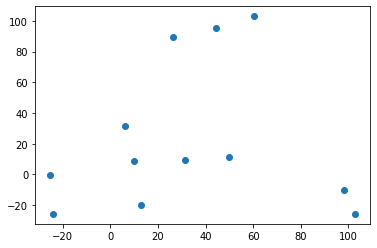

In [9]:
import matplotlib.pyplot as plt

plt.scatter(tsne_embedded_papers[:, 0], tsne_embedded_papers[:, 1]);

default: For the given index, "create and refine" an answer by sequentially going through each Node; make a separate LLM call per Node. Good for more detailed answers.


Begins with the prompt:

`Please summarize this scientific paper. You will receive the paper one passage at a time to "create and refine" an answer by sequentially going through each passage.`

Iteratively using the prompt:

`Please add the information in this paragraph to the summary you have outputted so far.`

In [11]:
summaries = [
    "This paper discusses the use of dual encoders, a common architecture for dense retrieval in natural language processing, and how they represent text. The authors propose interpreting the vector representations produced by dual encoders by projecting them into the model's vocabulary space and show that the resulting distributions of vocabulary tokens contain rich semantic information. They also find that this view can explain some failure cases of dense retrieval models and propose a method for improving performance by enriching query and passage representations with lexical information at inference time, which is shown to significantly improve performance in out-of-domain settings.",
    "This paper discusses the effectiveness of dense retrieval models based on neural text representations, which have outperformed traditional sparse models like BM25. However, these models often experience a significant decrease in performance when applied in out-of-domain settings, and the reasons for these failures are not well understood due to a lack of investigation into the mechanisms underlying dense representations.",
    "In this work, the authors present a new approach for interpreting and understanding dense retrieval models through the use of distributions induced by the query and passage representations when projected into the vocabulary space. These distributions provide insight into the nature of dense models and their failures, and can be used to develop simple solutions to improve performance.",
    "The authors propose a framework for interpreting and understanding dense retrieval models through the use of distributions induced by projecting query and passage representations into the vocabulary space. These projections enable analysis of the models and can be used to improve retrieval representations. An example of this process is shown in Figure 1, in which a question is run through the question encoder of a dense retrieval model and projected into the vocabulary space using a masked language modeling head, resulting in a distribution over the vocabulary. This process is also applied to passages.",
    "",
]

Begins with the prompt:

``

Iteratively using the prompt:

`Please update the summary so far: {summary} with this next passage from the paper: {passage}`

compact: For the given index, "compact" the prompt during each LLM call by stuffing as many Node text chunks that can fit within the maximum prompt size. If there are too many chunks to stuff in one prompt, "create and refine" an answer by going through multiple prompts.

tree_summarize: Given a set of Nodes and the query, recursively construct a tree and return the root node as the response. Good for summarization purposes.